(224, 224, 3)


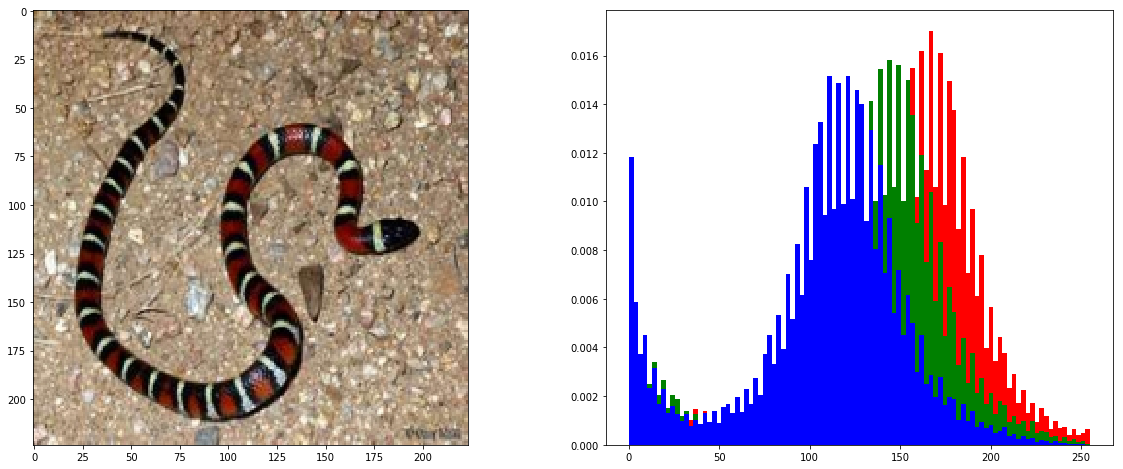

In [2]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import keras
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline


img_path = 'D://snake.jpg'
img = image.load_img(img_path, target_size=(224, 224)) # returns a PIL Image
img = image.img_to_array(img) # converts the pixel into a numpy array, with shape [224,224,3], with dtype=np.float32!


fig = plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8))

plt.subplot(1,2,2)
plt.hist(img[:,:,0].flatten(), bins=100, normed=True, color='r')
plt.hist(img[:,:,1].flatten(), bins=100, normed=True, color='g')
plt.hist(img[:,:,2].flatten(), bins=100, normed=True, color='b')
print(img.shape)

In [3]:
vgg = keras.applications.VGG16(include_top=True, weights='imagenet')

In [4]:
# create a batch of size 1 [N,H,W,C]
img_ = np.expand_dims(img, 0) 

# specific processing for VGG : RGB -> BGR, substract mean 'BGR', to float 32
img_ = preprocess_input(img_)

In [5]:

# apply the model to the pre-processed image : 
preds = vgg.predict(img_)

# print top 5 prediction 
pprint(decode_predictions(preds, top=5)[0])

[('n01734418', 'king_snake', 0.79123247),
 ('n01740131', 'night_snake', 0.1949865),
 ('n01728920', 'ringneck_snake', 0.004612679),
 ('n01737021', 'water_snake', 0.004567443),
 ('n01751748', 'sea_snake', 0.0022539094)]


In [6]:

vgg_layers = [ layer.name for layer in vgg.layers]
print(vgg_layers)

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


In [9]:
block3_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_pool').output)

In [10]:

block3_pool_featres = block3_pool_extractor.predict(img_)
print(block3_pool_featres.shape)

(1, 28, 28, 256)


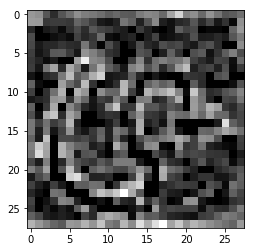

In [11]:
plt.imshow(block3_pool_featres[0, :, :, 0], cmap='gray')

In [12]:
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
    plt.show()



(1, 112, 112, 64)


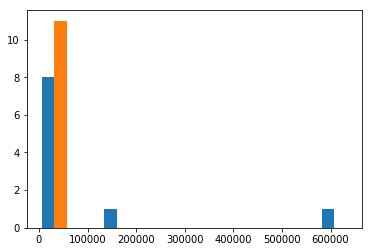

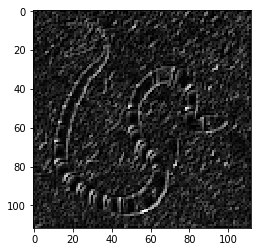

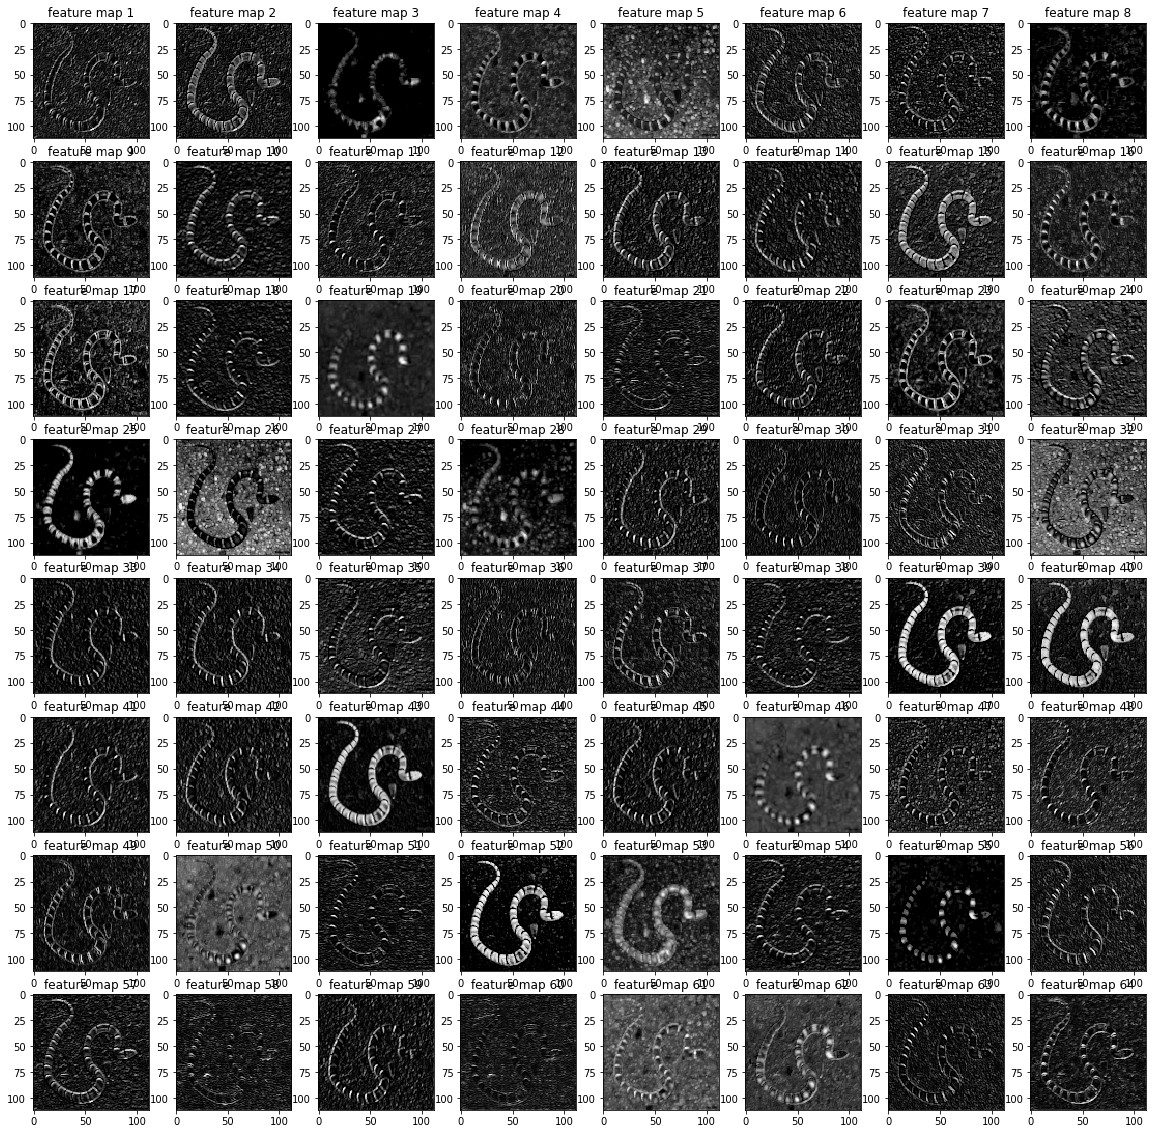

In [21]:
block1_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block1_pool').output)
block1_pool_featres = block1_pool_extractor.predict(img_)
print(block1_pool_featres.shape)
plt.hist(np.histogram(block1_pool_featres))
plt.show()
plt.imshow(block1_pool_featres[0, :, :, 0], cmap='gray')
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
        
    
plot_feature_maps(block1_pool_featres[0])

(1, 56, 56, 128)


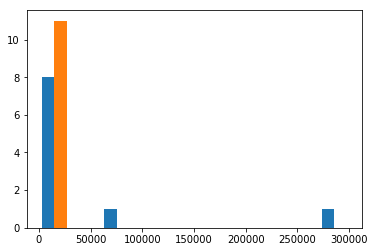

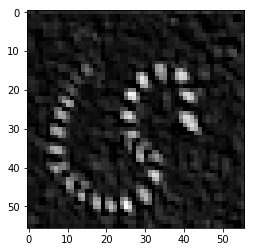

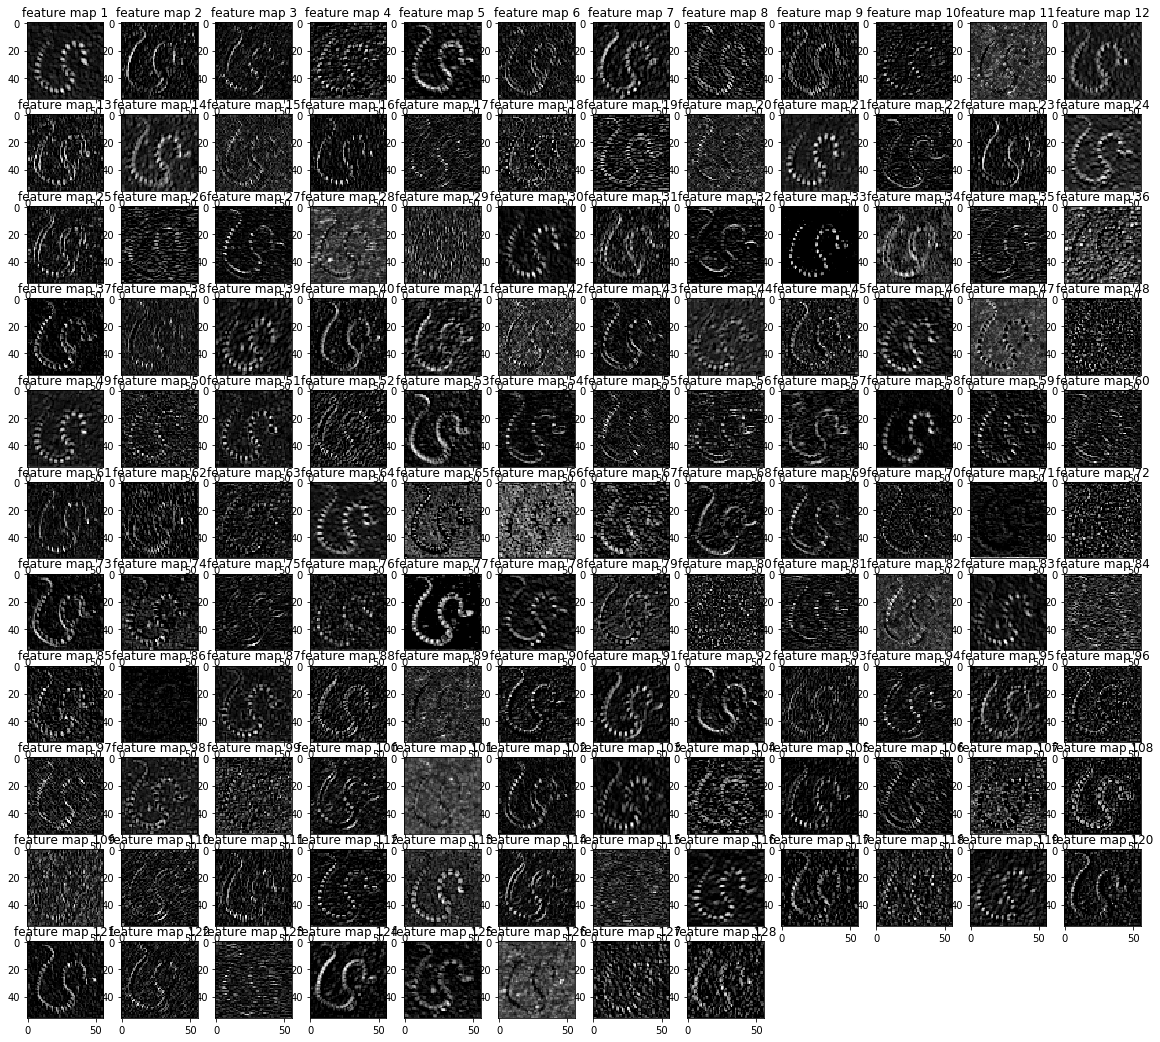

In [22]:
block2_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block2_pool').output)
block2_pool_featres = block2_pool_extractor.predict(img_)
print(block2_pool_featres.shape)
plt.hist(np.histogram(block2_pool_featres))
plt.show()
plt.imshow(block2_pool_featres[0, :, :, 0], cmap='gray')
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = 12
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
        
    
plot_feature_maps(block2_pool_featres[0])

(1, 28, 28, 256)


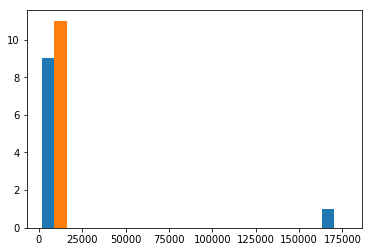

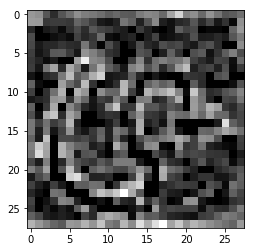

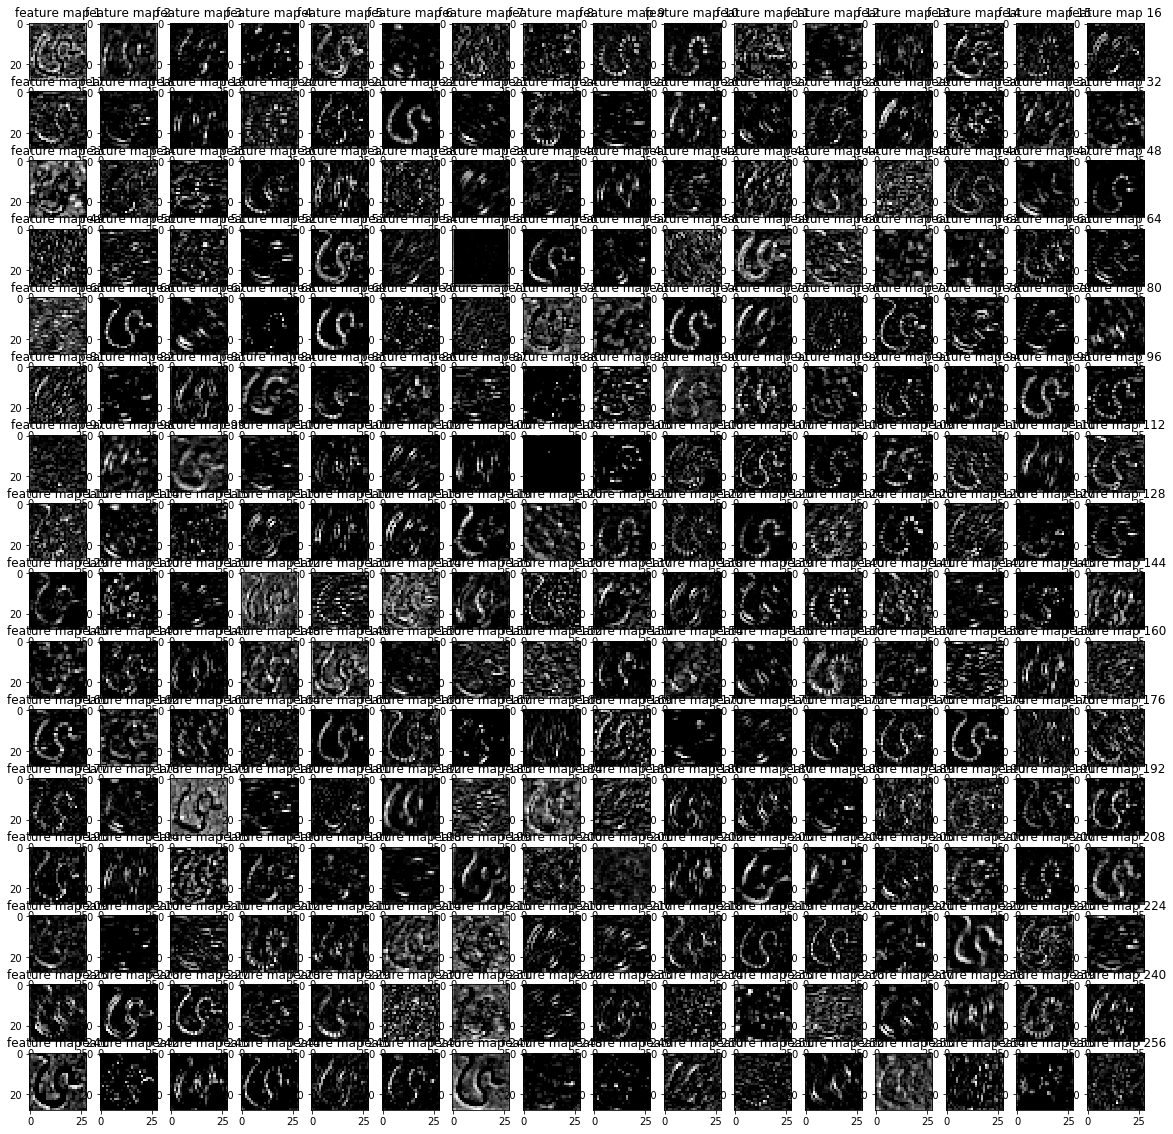

In [18]:
block3_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block3_pool').output)
block3_pool_featres = block3_pool_extractor.predict(img_)
print(block3_pool_featres.shape)
plt.hist(np.histogram(block3_pool_featres))
plt.show()
plt.imshow(block3_pool_featres[0, :, :, 0], cmap='gray')

def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))

    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
        
    
plot_feature_maps(block3_pool_featres[0])

(1, 14, 14, 512)


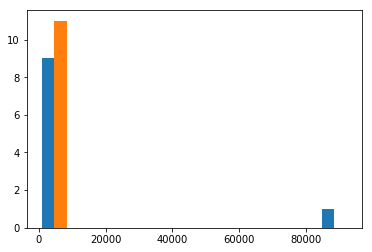

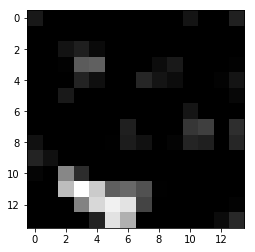

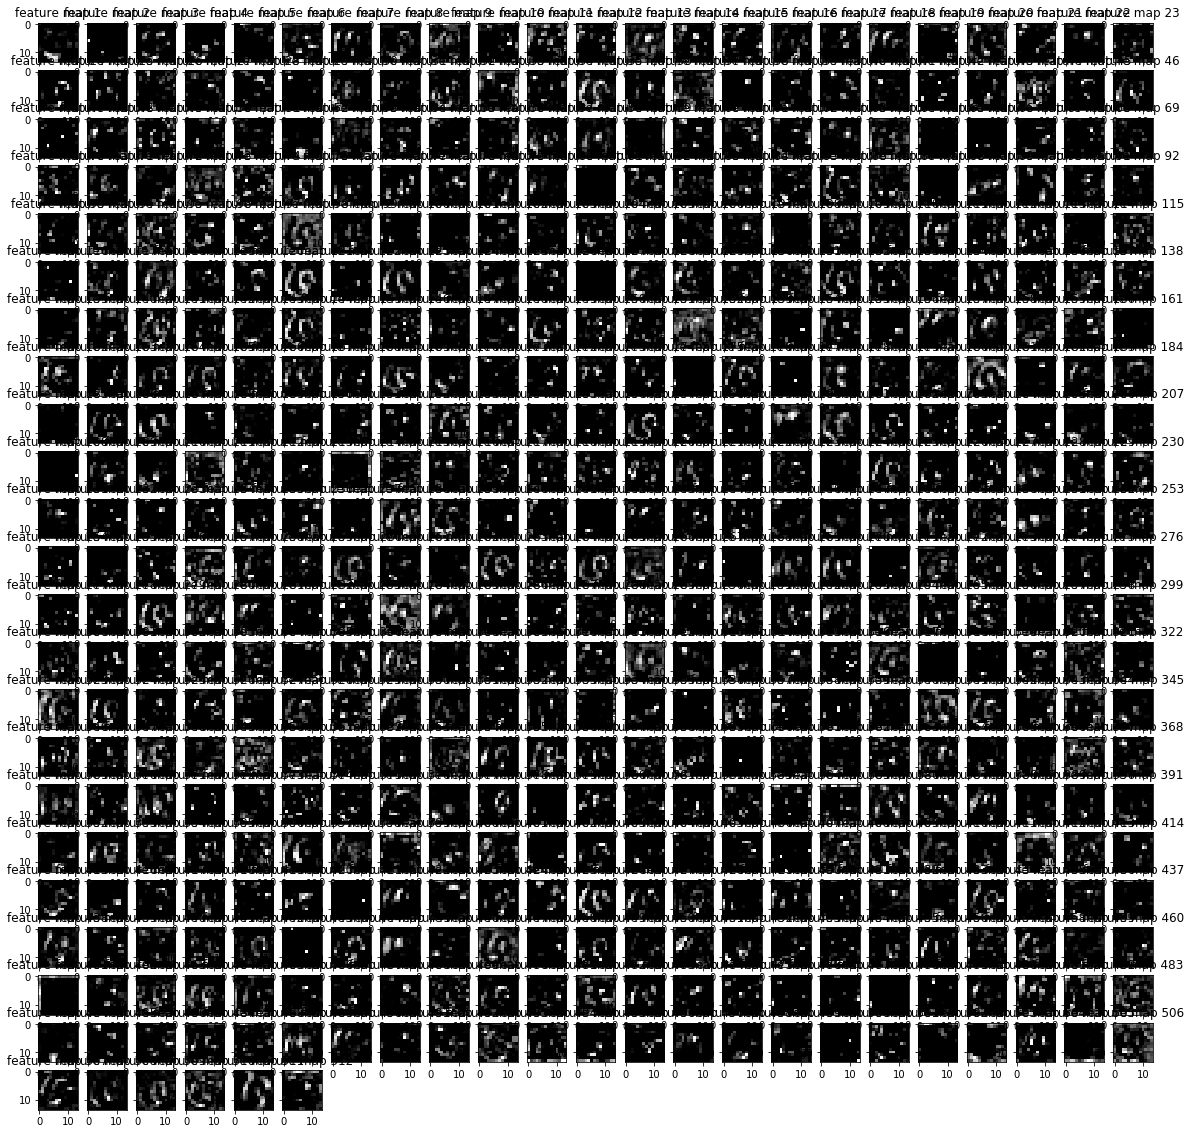

In [25]:
block4_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block4_pool').output)
block4_pool_featres = block4_pool_extractor.predict(img_)
print(block4_pool_featres.shape)
plt.hist(np.histogram(block4_pool_featres))
plt.show()
plt.imshow(block4_pool_featres[0, :, :, 0], cmap='gray')
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
        
    
plot_feature_maps(block4_pool_featres[0])

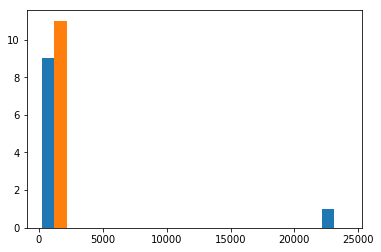

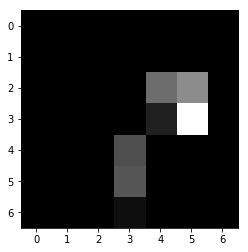

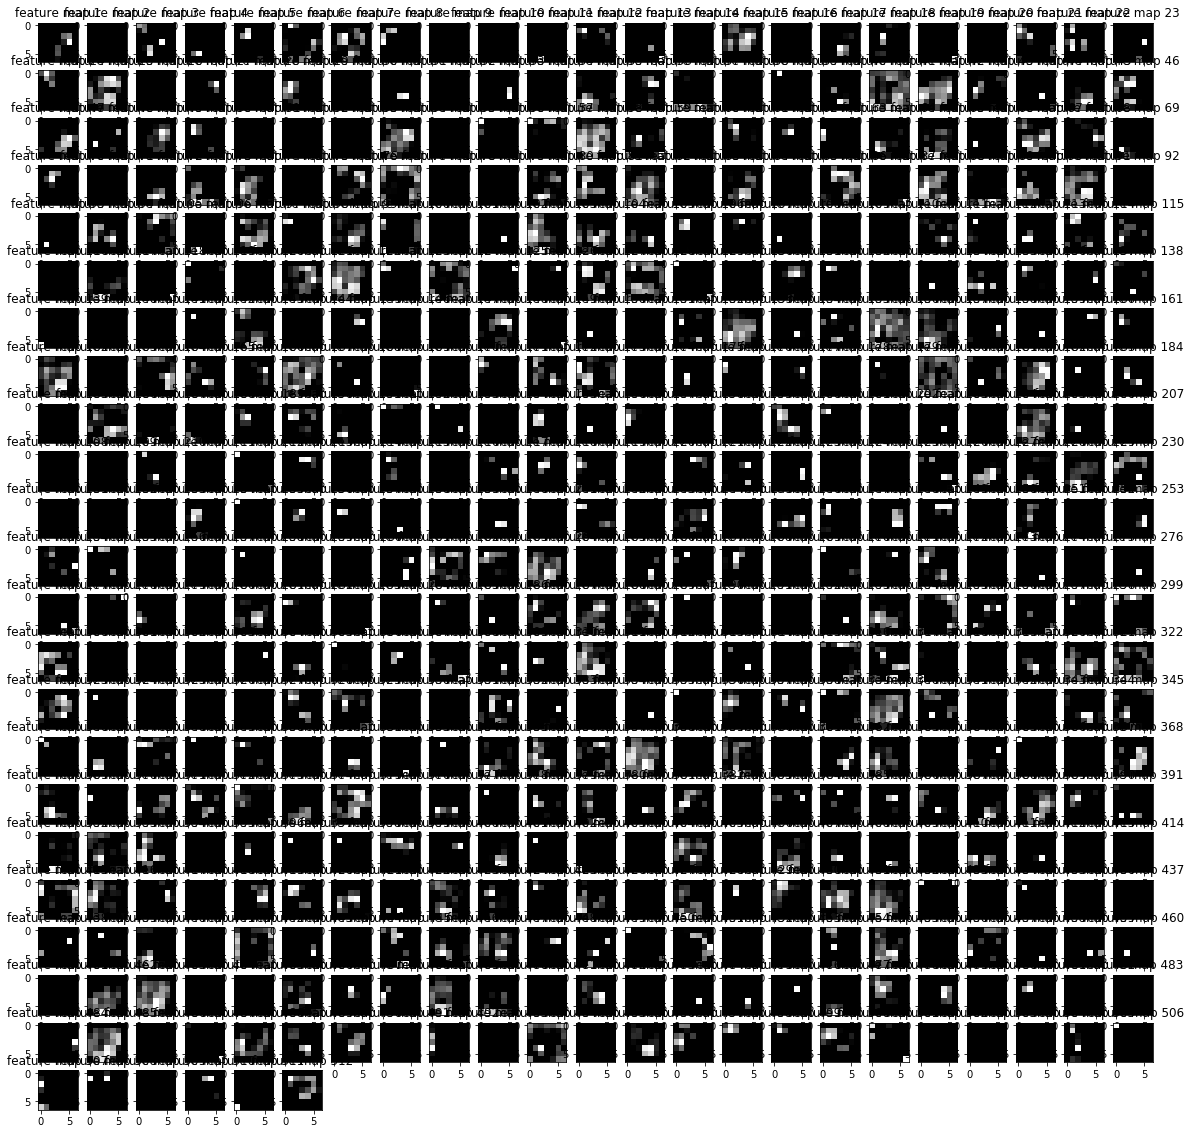

In [24]:
block5_pool_extractor = Model(inputs=vgg.input, outputs=vgg.get_layer('block5_pool').output)
block5_pool_featres = block5_pool_extractor.predict(img_)
plt.hist(np.histogram(block5_pool_featres))
plt.show()
plt.imshow(block5_pool_featres[0, :, :, 0], cmap='gray')
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
        
    
plot_feature_maps(block5_pool_featres[0])

